# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

(Please insert the background here )


## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [32]:
import requests

url_get = requests.get('https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [33]:
url_get.content[1:777]

b'\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle", {wb: 1});\n    }\n</script>\n  <script>(function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);</script>\n        <title>Released between 2019-01-01 and 2019-12-31\n(Sorted by Popularity Ascending) - IMDb</title>\n  <script>(function(t)'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [34]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")
print(type(soup))

<class 'bs4.BeautifulSoup'>


In [35]:
print(soup.prettify()[:1045])

<!DOCTYPE html>
<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://ogp.me/ns#">
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
  <meta content="app-id=342792525, app-argument=imdb:///?src=mdot" name="apple-itunes-app"/>
  <script type="text/javascript">
   var IMDbTimer={starttime: new Date().getTime(),pt:'java'};
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("bb", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_pre_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <title>
   Released between 2019-01-01 and 2019-12-31
(Sorted by Popularity Ascending) - IMDb
  </title>
  <script>
   (function(t){ (t.events = t.events || {})["csm_head_post_title"] = new Date().getTime(); })(IMDbTimer);
  </script>
  <script>
   if (typeof uet == 'function') {
      uet("be", "LoadTitle", {wb: 1});
    }
  </script>
  <script>
   if (typeof uex == 'functi

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell. (please change this markdown with your explanation)

In [36]:
table = soup.find('div',attrs={'class':'lister-list'})
print(table.prettify()[1:500])

div class="lister-list">
 <div class="lister-item mode-advanced">
  <div class="lister-top-right">
   <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088">
   </div>
  </div>
  <div class="lister-item-image float-left">
   <a href="/title/tt8111088/">
    <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,6


In [37]:
tr = table.find_all('div',attrs={'class':'lister-item mode-advanced'})
tr[:2] # just call 2 founded tr

[<div class="lister-item mode-advanced">
 <div class="lister-top-right">
 <div class="ribbonize" data-caller="filmosearch" data-tconst="tt8111088"></div>
 </div>
 <div class="lister-item-image float-left">
 <a href="/title/tt8111088/"> <img alt="The Mandalorian" class="loadlate" data-tconst="tt8111088" height="98" loadlate="https://m.media-amazon.com/images/M/MV5BZDhlMzY0ZGItZTcyNS00ZTAxLWIyMmYtZGQ2ODg5OWZiYmJkXkEyXkFqcGdeQXVyODkzNTgxMDg@._V1_UX67_CR0,0,67,98_AL_.jpg" src="https://m.media-amazon.com/images/S/sash/4FyxwxECzL-U1J8.png" width="67"/>
 </a> </div>
 <div class="lister-item-content">
 <h3 class="lister-item-header">
 <span class="lister-item-index unbold text-primary">1.</span>
 <a href="/title/tt8111088/">The Mandalorian</a>
 <span class="lister-item-year text-muted unbold">(2019– )</span>
 </h3>
 <p class="text-muted">
 <span class="runtime">40 min</span>
 <span class="ghost">|</span>
 <span class="genre">
 Action, Adventure, Sci-Fi            </span>
 </p>
 <div class="rat

Do the scrapping process here (please change this markdown with your explanation)

In [38]:
temp = [] #initiating a tuple

for i in range(0, len(tr)):
    #scrapping process
    row = table.find_all('div',attrs={'class':'lister-item-content'})[i]
    
    #get judul
    judul = row.find_all('a')[0].text
    judul = judul.strip() #for removing the excess whitespace
    
    #get rating
    rating = row.find_all('strong')[0].text
    rating = rating.strip()
    
    #get metascore
    metascore = row.find_all('span', attrs={'class':'metascore favorable'})
    if not metascore:
        metascore=0
    else :
        metascore=metascore[0].text
        metascore=metascore.strip()
    
    #get vote
    votes = row.find_all('span',attrs={'name':'nv'})[0].text
    votes = votes.strip()
    
    temp.append((judul, rating,metascore, votes)) 
    
temp 

[('The Mandalorian', '8.8', 0, '296,662'),
 ('For All Mankind', '7.7', 0, '13,864'),
 ('The Boys', '8.7', 0, '251,525'),
 ('Avengers: Endgame', '8.4', '78', '827,254'),
 ('The Witcher', '8.2', 0, '303,226'),
 ('Servant', '7.6', 0, '20,268'),
 ('Captain Marvel', '6.9', '64', '452,457'),
 ('Sound of Metal', '7.8', '82', '37,183'),
 ('Euphoria', '8.4', 0, '66,259'),
 ('Gisaengchung', '8.6', '96', '571,196'),
 ('Once Upon a Time... in Hollywood', '7.6', '83', '561,854'),
 ('Batwoman', '3.4', 0, '32,813'),
 ('The Bay', '7.0', 0, '4,175'),
 ('Knives Out', '7.9', '82', '467,722'),
 ('Sex Education', '8.3', 0, '160,319'),
 ('The Gentlemen', '7.8', 0, '247,859'),
 ('ZeroZeroZero', '8.2', 0, '15,187'),
 ('Joker', '8.4', 0, '957,437'),
 ('Capitani', '6.7', 0, '1,949'),
 ('Virgin River', '7.5', 0, '20,569'),
 ('Chernobyl', '9.4', 0, '548,249'),
 ('The Morning Show', '8.4', 0, '53,083'),
 ('Midsommar', '7.1', '72', '206,063'),
 ('Prodigal Son', '7.7', 0, '13,319'),
 ('1917', '8.3', '78', '438,747')

## Creating data frame & Data wrangling

Put the array into dataframe

In [39]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('judul','imdb_rating', 'metascore', 'votes'))
df['votes'] = df['votes'].str.replace(",","")
df.head()

,judul,imdb_rating,metascore,votes
0,The Mandalorian,8.8,0,296662
1,For All Mankind,7.7,0,13864
2,The Boys,8.7,0,251525
3,Avengers: Endgame,8.4,78,827254
4,The Witcher,8.2,0,303226


In [40]:
df.dtypes

judul          object
imdb_rating    object
metascore      object
votes          object
dtype: object

In [41]:
df['imdb_rating'] = df['imdb_rating'].astype('float')
df['metascore'] = df['metascore'].astype('int')
df['imdb_rating']=df['imdb_rating']*10
df['votes'] = df['votes'].astype('int')
df.dtypes

judul           object
imdb_rating    float64
metascore        int32
votes            int32
dtype: object

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [43]:
from pylab import rcParams
rcParams['figure.figsize'] = 20, 7

In [44]:
top7_movie = df.sort_values('votes', ascending=False).head(7)
top7_movie

,judul,imdb_rating,metascore,votes
17,Joker,84.0,0,957437
3,Avengers: Endgame,84.0,78,827254
9,Gisaengchung,86.0,96,571196
10,Once Upon a Time... in Hollywood,76.0,83,561854
20,Chernobyl,94.0,0,548249
13,Knives Out,79.0,82,467722
6,Captain Marvel,69.0,64,452457


Do the data cleaning here (please change this markdown with your explanation of what you do for data wrangling)

karena pada data list film yang diperoleh dari scraping web pada halaman https://www.imdb.com/search/title/?release_date=2019-01-01,2019-12-31
tidak mengandung mising value, maka yang saya lakukan adalah hanya mengubah `','` pada kolom `votes` dan mengubah tipe data `metascore` dan `votes` menjadi `int64`
sedangkan tipe data `imdb_rating` menjadi `float64`

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

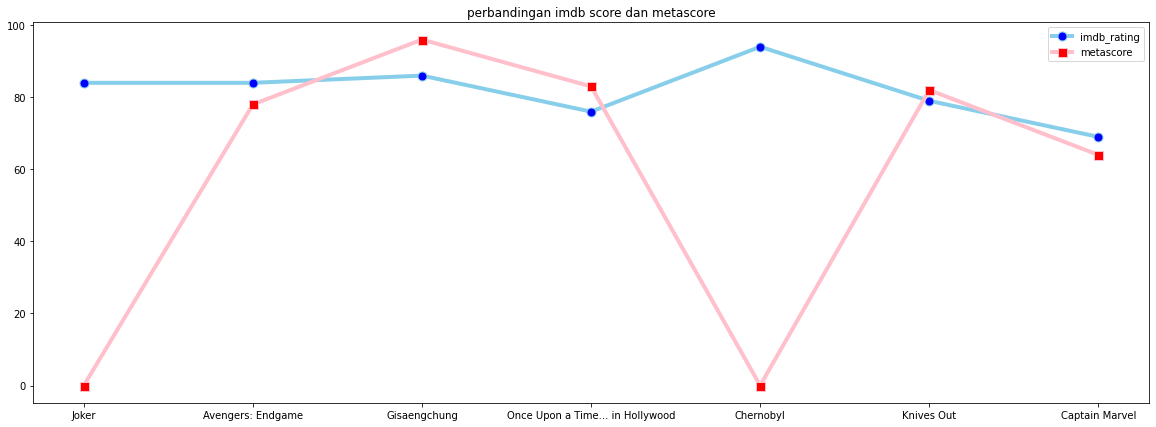

In [45]:
plt.plot( 'judul', 'imdb_rating', data=top7_movie, marker='o', markerfacecolor='blue', markersize=9, color='skyblue', linewidth=4)
plt.plot( 'judul', 'metascore', data=top7_movie, marker='s', markersize=9,markerfacecolor='red', color='pink', linewidth=4)
plt.title('perbandingan imdb score dan metascore')
plt.legend()

**Analysis**
1. film yang termasuk dalam top 7 movie adalah `joker`, `Avengers:Endgame`, `Gisaengchung`, `Once Upon a Time... in Hollywood`, 
   `Chernobyl`, `Knives Out`, dan `Captain Marvel`.
2. pada tahun 2019, film yang mendapatkan rating tertinggi yaitu `Chernobyl`
3. pada top 7 movie, semua film memiliki metascore kecuali `joker` dan `Chernobyl`
4. film yang memiliki metascore tertinggi yaitu `Gisaengchung`

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.

In [47]:
data_tabel=df.copy().sort_values('votes', ascending=False)
data_tabel.reset_index(drop=True)

,judul,imdb_rating,metascore,votes
0,Joker,84.0,0,957437
1,Avengers: Endgame,84.0,78,827254
2,Gisaengchung,86.0,96,571196
3,Once Upon a Time... in Hollywood,76.0,83,561854
4,Chernobyl,94.0,0,548249
5,Knives Out,79.0,82,467722
6,Captain Marvel,69.0,64,452457
7,1917,83.0,78,438747
8,Star Wars: Episode IX - The Rise of Skywalker,66.0,0,379313
9,Spider-Man: Far from Home,75.0,69,330043
